In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import requests
from plotnine import *
import regex as re
import io
import requests

In [145]:
# read raw data from csv file
raw_data = pd.read_csv('./datasets/suicide homicide gdp.csv', sep=',')

# display the raw DataFrame
display(raw_data)

,country,iso3c,iso2c,year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)",adminregion,incomeLevel
0,Afghanistan,AFG,AF,1970,NaN,NaN,1.748887e+09,NaN,South Asia,Low income
1,Afghanistan,AFG,AF,1971,NaN,NaN,1.831109e+09,NaN,South Asia,Low income
2,Afghanistan,AFG,AF,1972,NaN,NaN,1.595555e+09,NaN,South Asia,Low income
3,Afghanistan,AFG,AF,1973,NaN,NaN,1.733333e+09,NaN,South Asia,Low income
4,Afghanistan,AFG,AF,1974,NaN,NaN,2.155555e+09,NaN,South Asia,Low income
...,...,...,...,...,...,...,...,...,...,...
13561,Zimbabwe,ZWE,ZW,2016,NaN,16.8,2.054868e+10,2806.469032,Sub-Saharan Africa (excluding high income),Lower middle income
13562,Zimbabwe,ZWE,ZW,2017,NaN,15.0,1.758489e+10,3795.642431,Sub-Saharan Africa (excluding high income),Lower middle income
13563,Zimbabwe,ZWE,ZW,2018,NaN,14.0,1.811554e+10,4017.221716,Sub-Saharan Africa (excluding high income),Lower middle income
13564,Zimbabwe,ZWE,ZW,2019,NaN,14.1,1.928429e+10,3783.547898,Sub-Saharan Africa (excluding high income),Lower middle income


In [146]:
# define variable names for the data columns
homicides = 'Intentional homicides (per 100,000 people)'
suicides = 'Suicide mortality rate (per 100,000 population)'
gdp = 'GDP (current US$)'
gdp_pc = 'GDP per capita, PPP (current international $)'

# define labels for visualization purposes
suicide_label = 'Suicide Rate Per 100,000 People'
gdp_pc_label = 'GDP Per Capita (PPP)'

# drop rows with missing values in the 'suicides' and 'incomeLevel' columns
data = raw_data.dropna(subset=[suicides, 'incomeLevel'])

# remove rows that don't meet certain conditions: 
# - year must be greater than or equal to 2000
# - incomeLevel must not be 'Aggregates' or 'Not classified'
data = data.drop(data[(data['year'] < 2000) | (data['incomeLevel'] == 'Aggregates') | (
    data['incomeLevel'] == 'Not classified')].index)

# drop unnecessary columns
data = data.drop(columns=[homicides, 'iso3c', 'iso2c'])

# rename columns for consistency and clarity
data = data.rename(
    columns={f'{gdp}': 'gdp', f'{gdp_pc}': 'gdp_pc', f'{suicides}': 'suicides'})

# remove rows where the country is 'World'
data = data[data['country'] != 'World']

# reset the index of the DataFrame after removing rows
data = data.reset_index(drop=True)

# display the resulting DataFrame
display(data)


,country,year,suicides,gdp,gdp_pc,adminregion,incomeLevel
0,Afghanistan,2000,4.9,NaN,NaN,South Asia,Low income
1,Afghanistan,2001,5.0,NaN,NaN,South Asia,Low income
2,Afghanistan,2002,5.0,4.055180e+09,877.014268,South Asia,Low income
3,Afghanistan,2003,5.0,4.515559e+09,927.857548,South Asia,Low income
4,Afghanistan,2004,5.0,5.226779e+09,925.441429,South Asia,Low income
...,...,...,...,...,...,...,...
3635,Zimbabwe,2015,18.0,1.996312e+10,2679.507615,Sub-Saharan Africa (excluding high income),Lower middle income
3636,Zimbabwe,2016,16.8,2.054868e+10,2806.469032,Sub-Saharan Africa (excluding high income),Lower middle income
3637,Zimbabwe,2017,15.0,1.758489e+10,3795.642431,Sub-Saharan Africa (excluding high income),Lower middle income
3638,Zimbabwe,2018,14.0,1.811554e+10,4017.221716,Sub-Saharan Africa (excluding high income),Lower middle income


In [147]:
# calculate the mean values of 'suicides', 'gdp', and 'gdp_pc' across countries and income levels
means_across_country = data.groupby(['country', 'incomeLevel'])[['suicides', 'gdp', 'gdp_pc']].mean().reset_index()

# calculate the mean values of 'suicides', 'gdp', and 'gdp_pc' across years and income levels
means_across_time = data.groupby(['year', 'incomeLevel'])[['suicides', 'gdp', 'gdp_pc']].mean().reset_index()

# display the resulting DataFrame that shows means across countries and income levels
display(means_across_country)

# display the resulting DataFrame that shows means across years and income levels
display(means_across_time)

,country,incomeLevel,suicides,gdp,gdp_pc
0,Afghanistan,Low income,4.460,1.368449e+10,1590.205477
1,Albania,Upper middle income,5.875,1.035320e+10,8810.190584
2,Algeria,Lower middle income,3.330,1.409770e+11,11661.982095
3,Angola,Lower middle income,7.310,7.622280e+10,6011.694445
4,Antigua and Barbuda,High income,0.655,1.188067e+09,20205.652180
...,...,...,...,...,...
177,Vanuatu,Lower middle income,18.750,5.983245e+08,2645.018747
178,Vietnam,Lower middle income,6.940,1.242308e+11,4492.639897
179,"Yemen, Rep.",Low income,5.815,2.474981e+10,3525.223533
180,Zambia,Lower middle income,10.200,1.667534e+10,2822.771255


,year,incomeLevel,suicides,gdp,gdp_pc
0,2000,High income,13.941176,5.308934e+11,28417.190469
1,2000,Low income,8.348148,7.361866e+09,1102.303458
2,2000,Lower middle income,10.557407,2.835959e+10,2942.269817
3,2000,Upper middle income,12.100000,8.619339e+10,7163.240052
4,2001,High income,13.731373,5.260995e+11,29223.902058
...,...,...,...,...,...
75,2018,Upper middle income,9.350000,4.725870e+11,17202.977805
76,2019,High income,11.168627,1.055134e+12,48738.547358
77,2019,Low income,6.488889,1.742048e+10,1924.373552
78,2019,Lower middle income,9.687037,1.429378e+11,6552.216990


c:\Users\jange\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


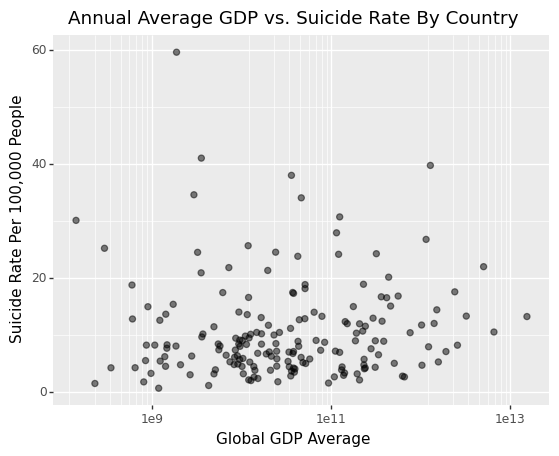

In [156]:
# Annual Average GDP vs. Suicide Rate By Country
splot = ggplot(means_across_country, aes(x='gdp', y='suicides')) +\
    geom_point(size=2, alpha=0.5) +\
    labs(title='Annual Average GDP vs. Suicide Rate By Country',
         x='Global GDP Average',
         y=suicide_label) + scale_x_log10()

print(splot)


c:\Users\jange\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 3 rows containing missing values.


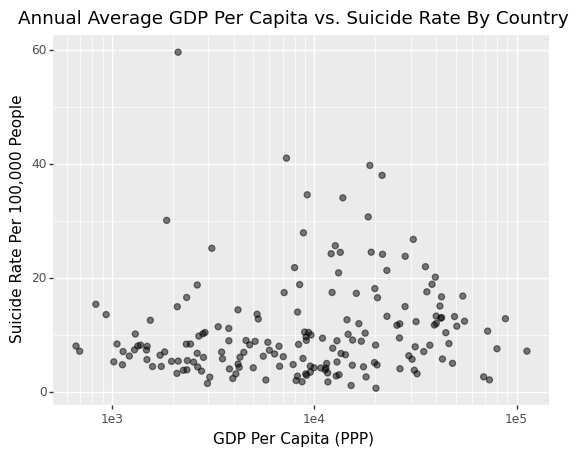

In [157]:
# Annual Average GDP Per Capita vs. Suicide Rate By Country
splot = ggplot(means_across_country, aes(x='gdp_pc', y='suicides')) +\
    geom_point(size=2, alpha=0.5) +\
    labs(title='Annual Average GDP Per Capita vs. Suicide Rate By Country',
         x=gdp_pc_label,
         y=suicide_label) + scale_x_log10()

print(splot)


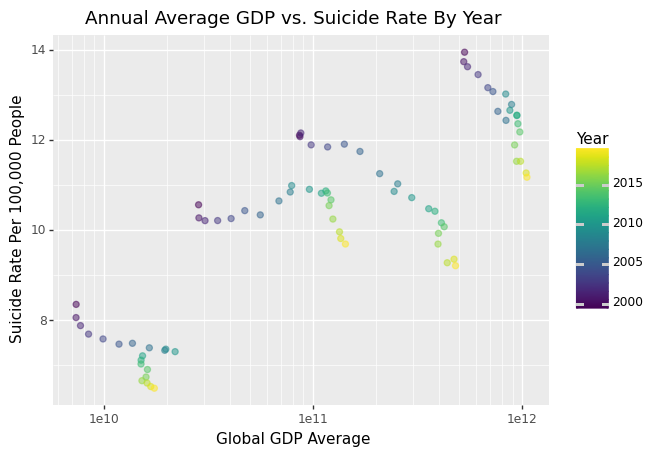

In [158]:
# Annual Average GDP vs. Suicide Rate By Year
splot = ggplot(means_across_time, aes(x='gdp', y='suicides', color='year')) +\
    geom_point(size=2, alpha=0.5) +\
    labs(title='Annual Average GDP vs. Suicide Rate By Year',
         x='Global GDP Average',
         y=suicide_label,
         color='Year') + scale_x_log10()

print(splot)


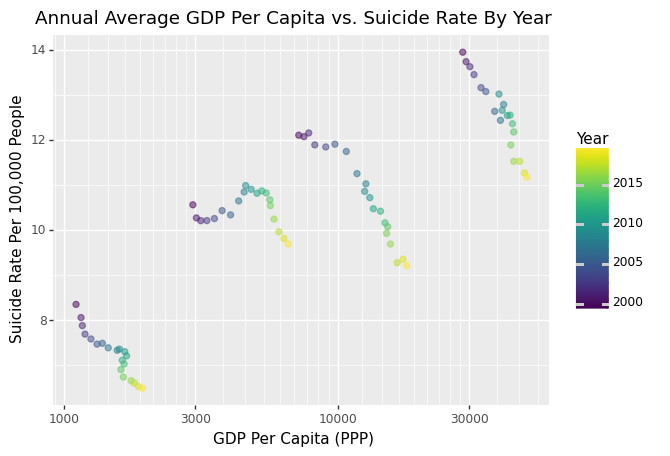

In [159]:
# Annual Average GDP Per Capita vs. Suicide Rate By Year
splot = ggplot(means_across_time, aes(x='gdp_pc', y='suicides', color='year')) +\
    geom_point(size=2, alpha=0.5) +\
    labs(title='Annual Average GDP Per Capita vs. Suicide Rate By Year',
         x=gdp_pc_label,
         y=suicide_label,
         color='Year') + scale_x_log10()

print(splot)

In [116]:
# fit linear regression model for gdp per capita vs. suicide rate
regression_model = smf.ols(formula=f'suicides ~ gdp_pc', data=data).fit()

display(regression_model.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               suicides   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.548
Date:                Fri, 12 May 2023   Prob (F-statistic):             0.0330
Time:                        21:23:11   Log-Likelihood:                -12781.
No. Observations:                3525   AIC:                         2.557e+04
Df Residuals:                    3523   BIC:                         2.558e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4824      0.201     52.054      0.000      10.088      10.877
gdp_pc      1.705e-05   7.99e-06      2.133      0.033    1.38e-06    3.27e-05
==============================================================================
Omnibus:                     2175.330   Durbin-Watson:                   0.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29000.515
Skew:                           2.733   Prob(JB):                         0.00
Kurtosis:                      15.945   Cond. No.                     3.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

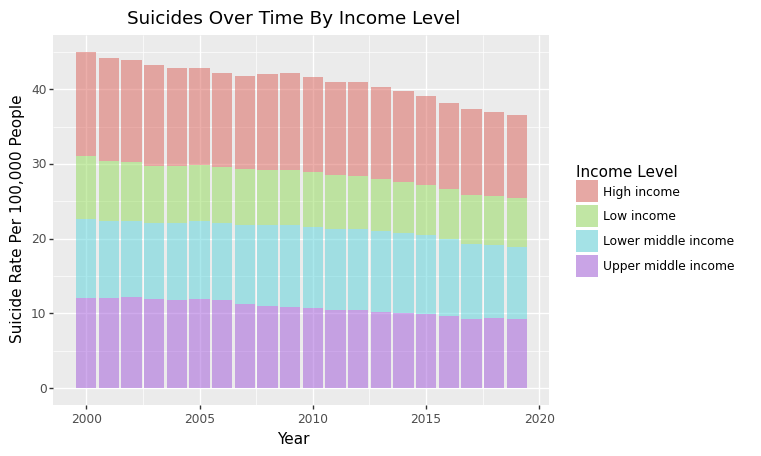

In [160]:
# Suicides Over Time By Income Level
bplot = ggplot(means_across_time, aes(x='year', y='suicides', fill='incomeLevel')) +\
    geom_col(size=0.5, alpha=0.5) +\
    labs(title='Suicides Over Time By Income Level',
         x='Year',
         y=suicide_label,
         fill='Income Level')
print(bplot)

c:\Users\jange\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 115 rows containing missing values.


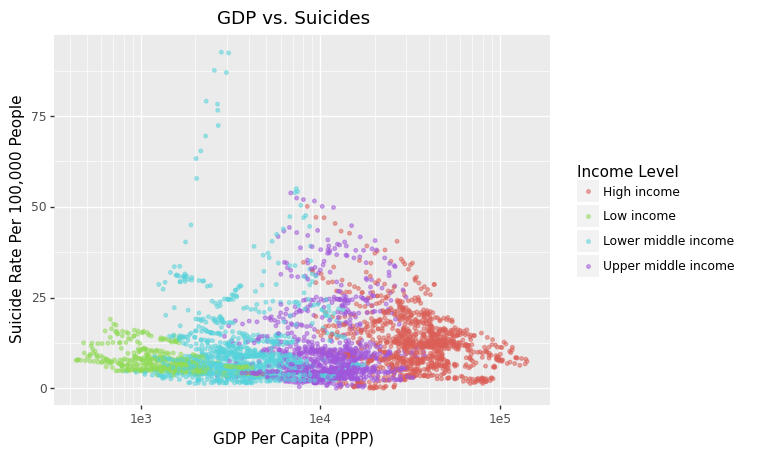

In [161]:
# GDP vs. Suicides
splot = ggplot(data, aes(x='gdp_pc', y='suicides', color='incomeLevel')) +\
    geom_point(size=1, alpha=0.5) +\
    labs(title='GDP vs. Suicides',
         x=gdp_pc_label,
         y=suicide_label,
         color='Income Level') +\
    scale_x_log10()

print(splot)

In [163]:
# read raw data from csv file
raw_data = pd.read_csv('./datasets/sex_race_gender_suicide_data_us.csv')

# display the raw DataFrame
display(raw_data)

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1950,1,All ages,0.0,13.2,NaN
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1960,2,All ages,0.0,12.5,NaN
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1970,3,All ages,0.0,13.1,NaN
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1980,4,All ages,0.0,12.2,NaN
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1981,5,All ages,0.0,12.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Not Hispanic or Latino: Black or Afric...,7.225,2018,42,65 years and over,5.0,1.3,NaN
6386,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 15-24 y...,7.232,2018,42,15-24 years,2.0,4.1,NaN
6387,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 25-44 y...,7.233,2018,42,25-44 years,3.0,4.4,NaN
6388,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 45-64 y...,7.234,2018,42,45-64 years,4.0,3.2,NaN


In [169]:
# drop rows with missing values in the 'ESTIMATE' column
data = raw_data.dropna(subset=['ESTIMATE'])

# remove rows that meet specific conditions: 
# - UNIT_NUM must be 1
# - YEAR must be less than 2000
data = data.drop(data[(data['UNIT_NUM'] == 1) | (data['YEAR'] < 2000)].index)

# drop unnecessary columns: 'UNIT', 'INDICATOR', 'UNIT_NUM', 'AGE_NUM', 'YEAR_NUM', 'FLAG'
data = data.drop(columns=['UNIT', 'INDICATOR', 'UNIT_NUM', 'AGE_NUM', 'YEAR_NUM', 'FLAG'], axis=1)

# extracts the category of interest from a row
def find_cat(category, str, label):
    match = re.search(str, label)
    if match == None:
        return 'All ' + category
    else:
        return match.group()

re_str = r'(Male|Female)'
data['SEX'] = data['STUB_LABEL'].apply(lambda label: find_cat('sex', re_str, label))

re_str = r'(White|Black or African American|Asian or Pacific Islander|American Indian or Alaska Native)'
data['RACE'] = data['STUB_LABEL'].apply(lambda label: find_cat('race', re_str, label))

re_str = r'(Not Hispanic or Latino|Hispanic or Latino)'
data['ETHNICITY'] = data['STUB_LABEL'].apply(lambda label: find_cat('ethnicity', re_str, label))

# reset the index of the DataFrame after removing rows
data = data.reset_index(drop=True)

# display the resulting DataFrame
display(data)

,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,AGE,ESTIMATE,SEX,RACE,ETHNICITY
0,Total,0,All persons,0.000,2000,All ages,10.4,All sex,All race,All ethnicity
1,Total,0,All persons,0.000,2001,All ages,10.7,All sex,All race,All ethnicity
2,Total,0,All persons,0.000,2002,All ages,11.0,All sex,All race,All ethnicity
3,Total,0,All persons,0.000,2003,All ages,10.9,All sex,All race,All ethnicity
4,Total,0,All persons,0.000,2004,All ages,11.1,All sex,All race,All ethnicity
...,...,...,...,...,...,...,...,...,...,...
2628,"Sex, age and race and Hispanic origin (Single ...",11,Female: Not Hispanic or Latino: Black or Afric...,7.225,2018,65 years and over,1.3,Female,Black or African American,Not Hispanic or Latino
2629,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 15-24 y...,7.232,2018,15-24 years,4.1,Female,All race,Hispanic or Latino
2630,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 25-44 y...,7.233,2018,25-44 years,4.4,Female,All race,Hispanic or Latino
2631,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 45-64 y...,7.234,2018,45-64 years,3.2,Female,All race,Hispanic or Latino


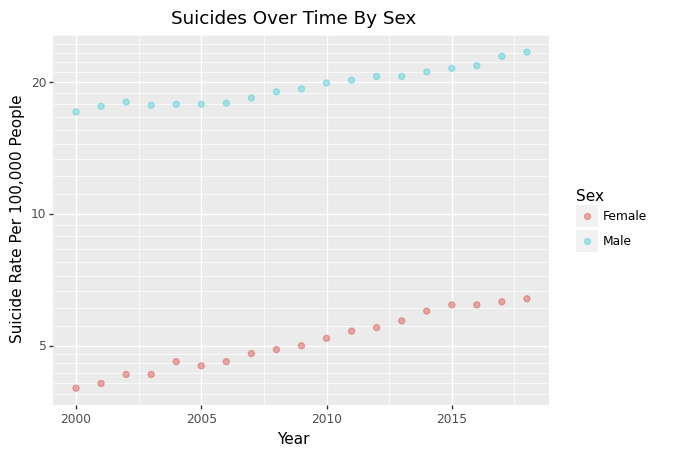

In [170]:
# Suicides Over Time By Sex
splot = ggplot(data[(data['STUB_NAME_NUM'] == 2)], aes(x='YEAR', y='ESTIMATE', color='STUB_LABEL')) +\
    geom_point(size=2, alpha=0.5) +\
    labs(title='Suicides Over Time By Sex',
         x='Year',
         y=suicide_label,
         color='Demographic') + scale_y_log10()

print(splot)


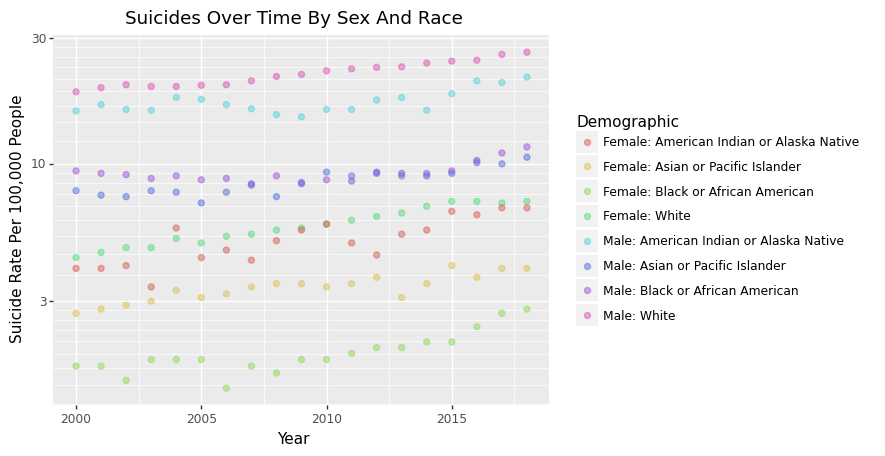

In [171]:
# Suicides Over Time By Sex And Race
splot = ggplot(data[(data['STUB_NAME_NUM'] == 4)], aes(x='YEAR', y='ESTIMATE', color='STUB_LABEL')) +\
    geom_point(size=2, alpha=0.5) +\
    labs(title='Suicides Over Time By Sex And Race',
         x='Year',
         y=suicide_label,
         color='Demographic') + scale_y_log10()

print(splot)


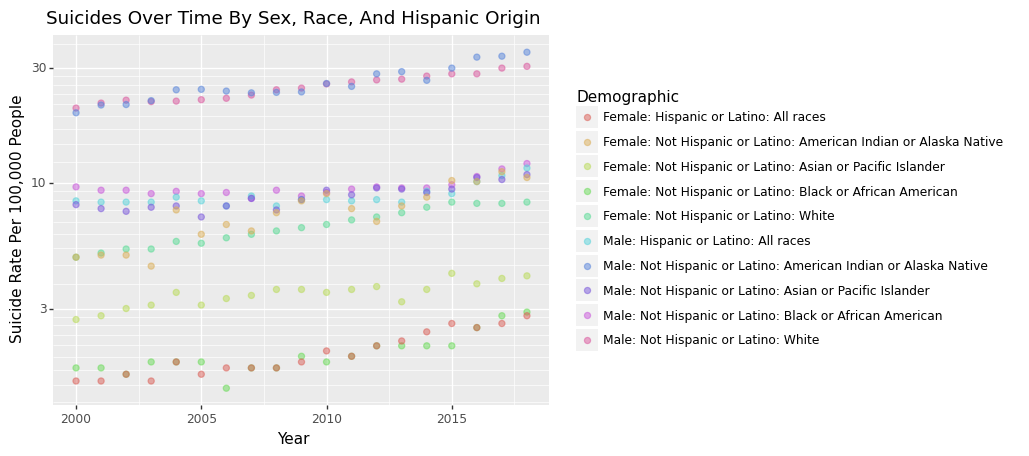

In [172]:
# Suicides Over Time By Sex, Race, And Hispanic Origin
splot = ggplot(data[(data['STUB_NAME_NUM'] == 6)], aes(x='YEAR', y='ESTIMATE', color='STUB_LABEL')) +\
    geom_point(size=2, alpha=0.5) +\
    labs(title='Suicides Over Time By Sex, Race, And Hispanic Origin',
         x='Year',
         y=suicide_label,
         color='Demographic') + scale_y_log10()

print(splot)

C:\Users\jange\AppData\Local\Temp\ipykernel_4620\2707760547.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.


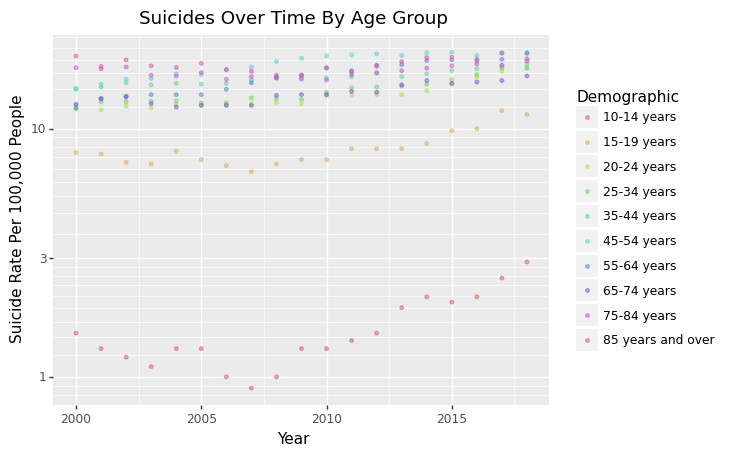

In [175]:
# regex pattern to match specific age categories
age_cat = r'(1[.]\d\d)|(1[.]1)'

# Scatter Plot: Suicides Over Time By Age Group
splot = ggplot(data[data['STUB_LABEL_NUM'].astype(str).str.contains(age_cat)], aes(x='YEAR', y='ESTIMATE', color='STUB_LABEL')) +\
    geom_point(size=1, alpha=0.5) +\
    labs(title='Suicides Over Time By Age Group',
         x='Year',
         y=suicide_label,
         color='Demographic') + scale_y_log10()

print(splot)

In [179]:
# fit linear regression model with interaction term
interaction_model = smf.ols('ESTIMATE ~  STUB_LABEL', data=data[(data['STUB_NAME_NUM'] == 6)]).fit()

print(interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:               ESTIMATE   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     374.8
Date:                Fri, 12 May 2023   Prob (F-statistic):          1.44e-111
Time:                        22:08:29   Log-Likelihood:                -390.67
No. Observations:                 190   AIC:                             801.3
Df Residuals:                     180   BIC:                             833.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [137]:
# Extracting the data for global gdp
gdp_states = requests.get('https://raw.githubusercontent.com/wadoodbutt/wadoodbutt.github.io/main/datasets/statesgdp.csv')

file_gdp_states = io.StringIO(gdp_states.text)

df_gdp_states = pd.read_csv(file_gdp_states, sep=',')
# Filthy, uncleaned data
print(df_gdp_states.head())
# Cleaning up the data / Rerranging the columns 
# Making aow the column headers then removing 3 irrelevant rows
df_gdp_states.columns = df_gdp_states.iloc[3]
df_gdp_states = df_gdp_states.drop([0,1,2,3])
df_gdp_states = df_gdp_states.reset_index(drop=True)
# Drop irrelevant columns and keeping the year and number of suicide columns 
df_gdp_states = df_gdp_states.drop(df_gdp_states.iloc[:, 4:44], axis=1)
# Extract united states data from global data
print(df_gdp_states.iloc[251])
df_gdp_states.head()

         Data Source World Development Indicators         Unnamed: 2  \
0                NaN                          NaN                NaN   
1  Last Updated Date                     3/1/2023                NaN   
2                NaN                          NaN                NaN   
3       Country Name                 Country Code     Indicator Name   
4              Aruba                          ABW  GDP (current US$)   

       Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
0             NaN         NaN         NaN         NaN         NaN         NaN   
1             NaN         NaN         NaN         NaN         NaN         NaN   
2             NaN         NaN         NaN         NaN         NaN         NaN   
3  Indicator Code      1960.0      1961.0      1962.0      1963.0      1964.0   
4  NY.GDP.MKTP.CD         NaN         NaN         NaN         NaN         NaN   

   Unnamed: 9  ...   Unnamed: 56   Unnamed: 57   Unnamed: 58   Unnamed: 59  \
0 

3,Country Name,Country Code,Indicator Name,Indicator Code,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1.873184e+09,1.896648e+09,1.962011e+09,2.044134e+09,2.254749e+09,2.359777e+09,...,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.368970e+09,2.610039e+09,3.126019e+09
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.839380e+11,2.588300e+11,2.648810e+11,3.526740e+11,4.388530e+11,5.122340e+11,...,9.720020e+11,9.826770e+11,1.003400e+12,9.231440e+11,8.898590e+11,1.030480e+12,1.016700e+12,1.009050e+12,9.341790e+11,1.089450e+12
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,3.854235e+09,4.539501e+09,5.220824e+09,6.226199e+09,...,2.020357e+10,2.056449e+10,2.055058e+10,1.999816e+10,1.801956e+10,1.889635e+10,1.841885e+10,1.890449e+10,2.014344e+10,1.478686e+10
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.404100e+11,1.467800e+11,1.766060e+11,2.044710e+11,2.534720e+11,3.100940e+11,...,7.360400e+11,8.322170e+11,8.924980e+11,7.669580e+11,6.905450e+11,6.837480e+11,7.663600e+11,7.947190e+11,7.848000e+11,8.401870e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,9.129595e+09,8.936064e+09,1.528559e+10,1.781270e+10,2.355205e+10,3.697092e+10,...,1.249980e+11,1.334020e+11,1.372440e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.361907e+10,6.740429e+10


In [138]:
# Extracting the data for global suicide
sui_states = requests.get('https://raw.githubusercontent.com/wadoodbutt/wadoodbutt.github.io/main/datasets/statessuicide.csv')

file_sui_states = io.StringIO(sui_states.text)

df_sui_states = pd.read_csv(file_sui_states, sep=',')
# Filthy, uncleaned data
print(df_sui_states.head())
# Cleaning up the data / Rerranging the columns 
# Making aow the column headers then removing 3 irrelevant rows
df_sui_states.columns = df_sui_states.iloc[3]
df_sui_states = df_sui_states.drop([0,1,2,3])
df_sui_states = df_sui_states.reset_index(drop=True)
df_sui_states = df_sui_states.drop(df_sui_states.iloc[:, 4:44], axis=1)
# Extract united states data from global data

print(df_sui_states.iloc[251])

         Data Source World Development Indicators  \
0                NaN                          NaN   
1  Last Updated Date                     3/1/2023   
2                NaN                          NaN   
3       Country Name                 Country Code   
4              Aruba                          ABW   

                                        Unnamed: 2      Unnamed: 3  \
0                                              NaN             NaN   
1                                              NaN             NaN   
2                                              NaN             NaN   
3                                   Indicator Name  Indicator Code   
4  Suicide mortality rate (per 100,000 population)  SH.STA.SUIC.P5   

   Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN    

       suicide               gdp
3                               
2000.0    11.0  10250900000000.0
2001.0    11.4  10581900000000.0
2002.0    11.8  10929100000000.0
2003.0    11.7  11456400000000.0
2004.0    11.9  12217200000000.0
2005.0    11.9  13039200000000.0
2006.0    12.1  13815600000000.0
2007.0    12.4  14474200000000.0
2008.0    12.7  14769900000000.0
2009.0    12.8  14478100000000.0
2010.0    13.1  15049000000000.0
2011.0    13.4  15599700000000.0
2012.0    13.5  16254000000000.0
2013.0    13.5  16843200000000.0
2014.0    14.0  17550700000000.0
2015.0    14.4  18206000000000.0
2016.0    15.1  18695100000000.0
2017.0    15.9  19477300000000.0
2018.0    15.7  20533100000000.0
2019.0    16.1  21381000000000.0
2020.0     NaN  21060500000000.0
2021.0     NaN  23315100000000.0


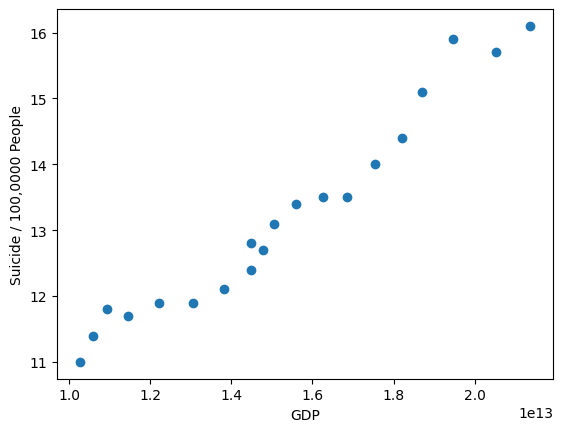

In [155]:
df_final = pd.DataFrame()
# Combining united states suicide and gdp
df_final['suicide'] = df_sui_states.iloc[251, 4:26].transpose() 
df_final['gdp'] = df_gdp_states.iloc[251, 4:26].transpose()
plt.scatter(x=df_final['gdp'], y=df_final['suicide'])
plt.xlabel("GDP")
plt.ylabel("Suicide / 100,0000 People")
print(df_final)
plt.show()


In [140]:
# Extracting the data for global suicide
gini_data = requests.get('https://raw.githubusercontent.com/wadoodbutt/wadoodbutt.github.io/main/datasets/gini_global_data.csv')

file_gini = io.StringIO(gini_data.text)

df_gini = pd.read_csv(file_gini, sep=',')
# Filthy, uncleaned data
print(df_gini.head())
# Cleaning up the data / Rerranging the columns 
# Making aow the column headers then removing 3 irrelevant rows
df_gini.columns = df_gini.iloc[3]
df_gini = df_gini.drop([0,1,2,3])
df_gini = df_gini.reset_index(drop=True)
df_gini = df_gini.drop(df_gini.iloc[:, 4:44], axis=1)
print(df_gini.iloc[251])
# Extract united states data from global data
df_gini.head()

         Data Source World Development Indicators      Unnamed: 2  \
0                NaN                          NaN             NaN   
1  Last Updated Date                     3/1/2023             NaN   
2                NaN                          NaN             NaN   
3       Country Name                 Country Code  Indicator Name   
4              Aruba                          ABW      Gini index   

       Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
0             NaN         NaN         NaN         NaN         NaN         NaN   
1             NaN         NaN         NaN         NaN         NaN         NaN   
2             NaN         NaN         NaN         NaN         NaN         NaN   
3  Indicator Code      1960.0      1961.0      1962.0      1963.0      1964.0   
4     SI.POV.GINI         NaN         NaN         NaN         NaN         NaN   

   Unnamed: 9  ...  Unnamed: 56  Unnamed: 57  Unnamed: 58  Unnamed: 59  \
0         NaN  ...      

3,Country Name,Country Code,Indicator Name,Indicator Code,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
0,Aruba,ABW,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Gini index,SI.POV.GINI,52.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,51.3,NaN,NaN,NaN


       suicide  gini
3                   
2000.0    11.0  40.1
2001.0    11.4  40.6
2002.0    11.8  40.4
2003.0    11.7  40.8
2004.0    11.9  40.3
2005.0    11.9  41.0
2006.0    12.1  41.4
2007.0    12.4  40.8
2008.0    12.7  40.8
2009.0    12.8  40.6
2010.0    13.1  40.0
2011.0    13.4  40.9
2012.0    13.5  40.9
2013.0    13.5  40.7
2014.0    14.0  41.5
2015.0    14.4  41.2
2016.0    15.1  41.1
2017.0    15.9  41.2
2018.0    15.7  41.4
2019.0    16.1  41.5


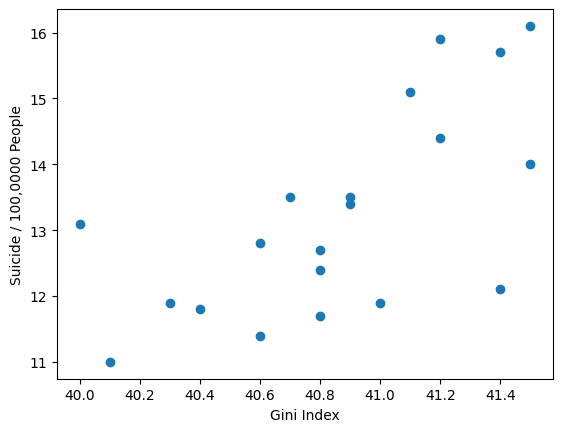

In [144]:
df_final_g = pd.DataFrame()
# Combining gini index data (% based) vs suicide in united states
df_final_g['suicide'] = df_sui_states.iloc[251, 4:24].transpose() 
df_final_g['gini'] = df_gini.iloc[251, 4:24].transpose()
plt.scatter(x=df_final_g['gini'], y=df_final_g['suicide'])
plt.xlabel("Gini Index")
plt.ylabel("Suicide / 100,0000 People")
print(df_final_g)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                suicide   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     13.57
Date:                Fri, 12 May 2023   Prob (F-statistic):            0.00170
Time:                        21:32:28   Log-Likelihood:                -31.044
No. Observations:                  20   AIC:                             66.09
Df Residuals:                      18   BIC:                             68.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -80.6659     25.489     -3.165      0.0

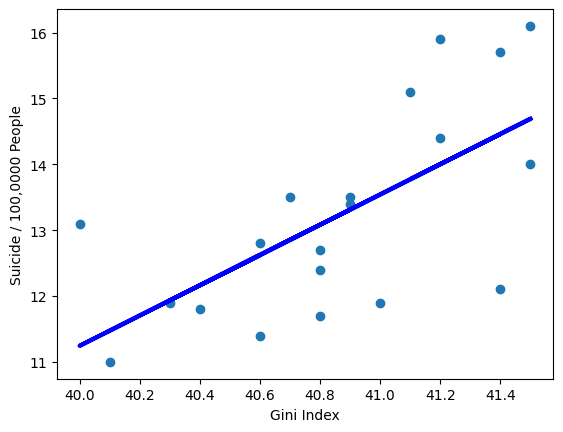

In [153]:
X = df_final_g['gini'].to_numpy().reshape(df_final_g['gini'].shape[0], 1)
y = df_final_g['suicide'].to_numpy().reshape(df_final_g['suicide'].shape[0], 1)
# Performing linear regression on gini vs suicide
linreg = LinearRegression()
mdl = linreg.fit(X,y)
new_y = linreg.predict(X)

# fit linear regression model for gini coefficient vs. suicide rate
regression_model = smf.ols(formula='suicide ~ gini', data=df_final_g.astype('float32')).fit()

print(regression_model.summary())

print(mdl.coef_)
print(mdl.intercept_)

plt.scatter(x=df_final_g['gini'], y=df_final_g['suicide'])
plt.xlabel("Gini Index")
plt.ylabel("Suicide / 100,0000 People")
plt.plot(X, new_y, color="blue", linewidth=3)
plt.show()